<a href="https://colab.research.google.com/github/Geological-Survey-Ireland/Hyperspectral/blob/main/2_Denoising_GSI_Hyperspectral_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Denoising GSI Hyperspectral Data**

This notebook will work through some processes for denoising the GSI's hyperspectral data.
To follow along, you should complete the [first notebook](https://github.com/Geological-Survey-Ireland/Hyperspectral).

Again the first thing is to import all of the modules we will need:

In [1]:
!pip install spectral

import spectral as sp
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.dpi'] = 200

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we need to open the data we produced in the last notebook, the filepaths in this codeblock should be the files you produced in the first notebook:

In [2]:
data = np.load('/content/drive/MyDrive/Public/GSI_17_007_Bx24_reflectance.npy')
bands = np.load('/content/drive/MyDrive/Public/Clipped_Bands.npy')

Now we can plot the same pixel as in the previous notebook, pixel (1000, 220)

<function matplotlib.pyplot.show(*args, **kw)>

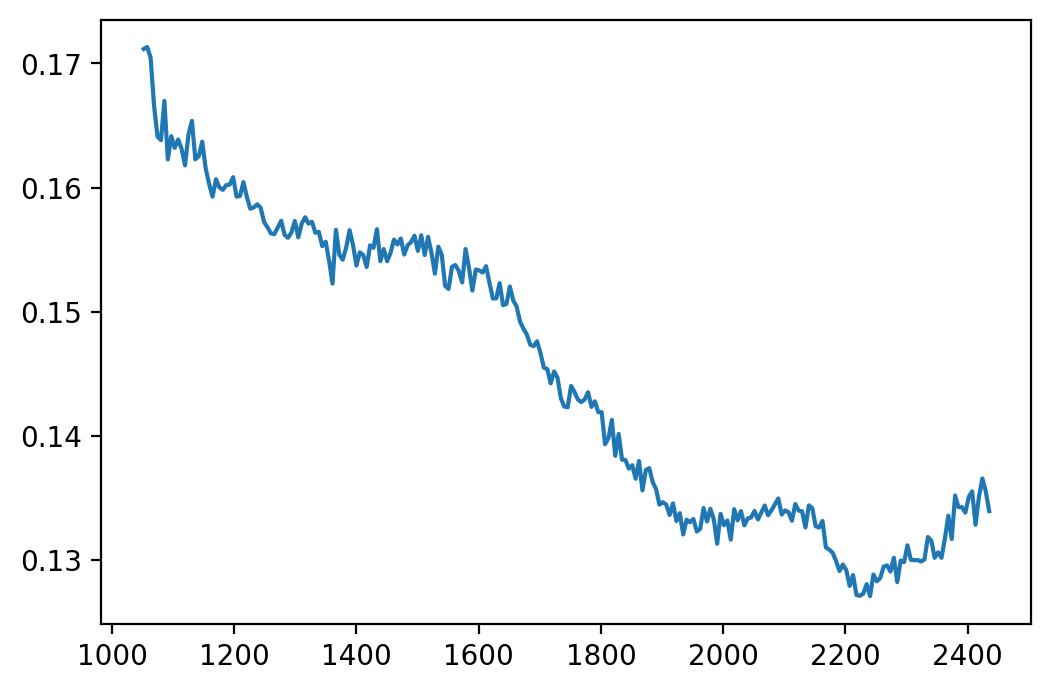

In [5]:

plt.figure()
plt.plot(bands, data[1000, 220])
plt.show

The data is very noisy. There are a multitude of ways to denoise this data, but this notebook will only go through two.

**Principal components transform**


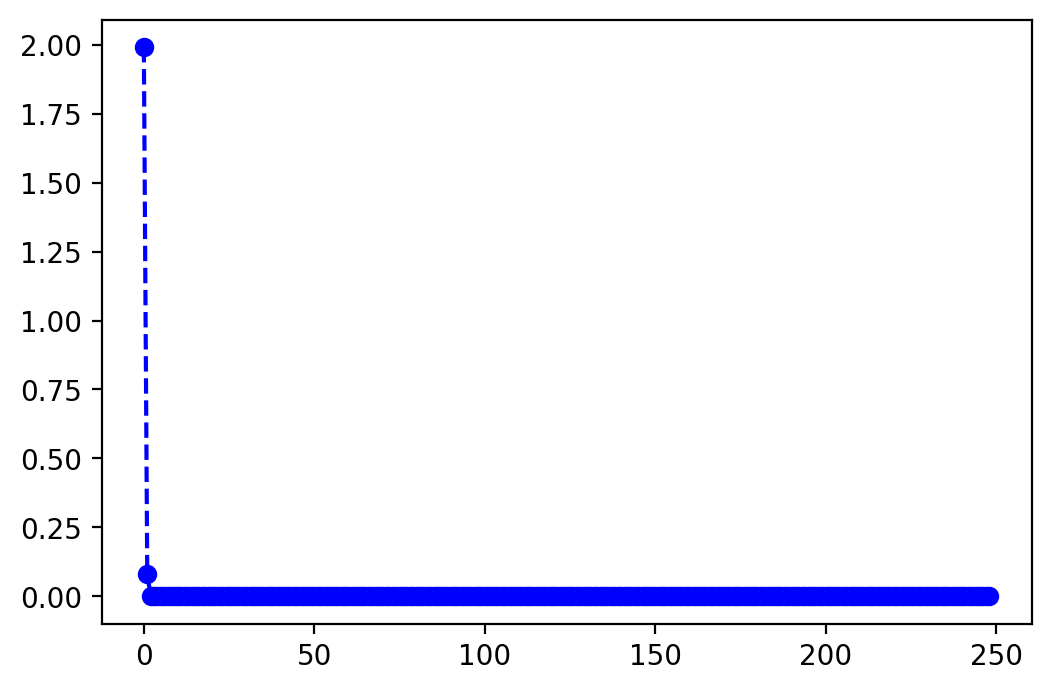

In [3]:
pc = sp.principal_components(data)
plt.figure()
plt.plot(pc.eigenvalues,linestyle='--', marker='o', color='b')
plt.show()

The lines of code above use the spectral module to calculate the principal components of the data.

The plot is shows all of the eigenvalues, and as you can see nearly all of the data is contained in the first principal component.

Using the spectral module we can denoise the data using a selection of the principal components.

In [7]:
denoised = pc.denoise(data, num=1)
denoised2 = pc.denoise(data, num=50)
denoised3 = pc.denoise(data, num=100)
denoised4 = pc.denoise(data, num=150)


The lines above perform the principal component transform using the first principal component, the first 50 principal components, the first 100 principal components and the first 150 principal components.

Plotting pixel (1000, 220) for each of these transforms we can see the effect.

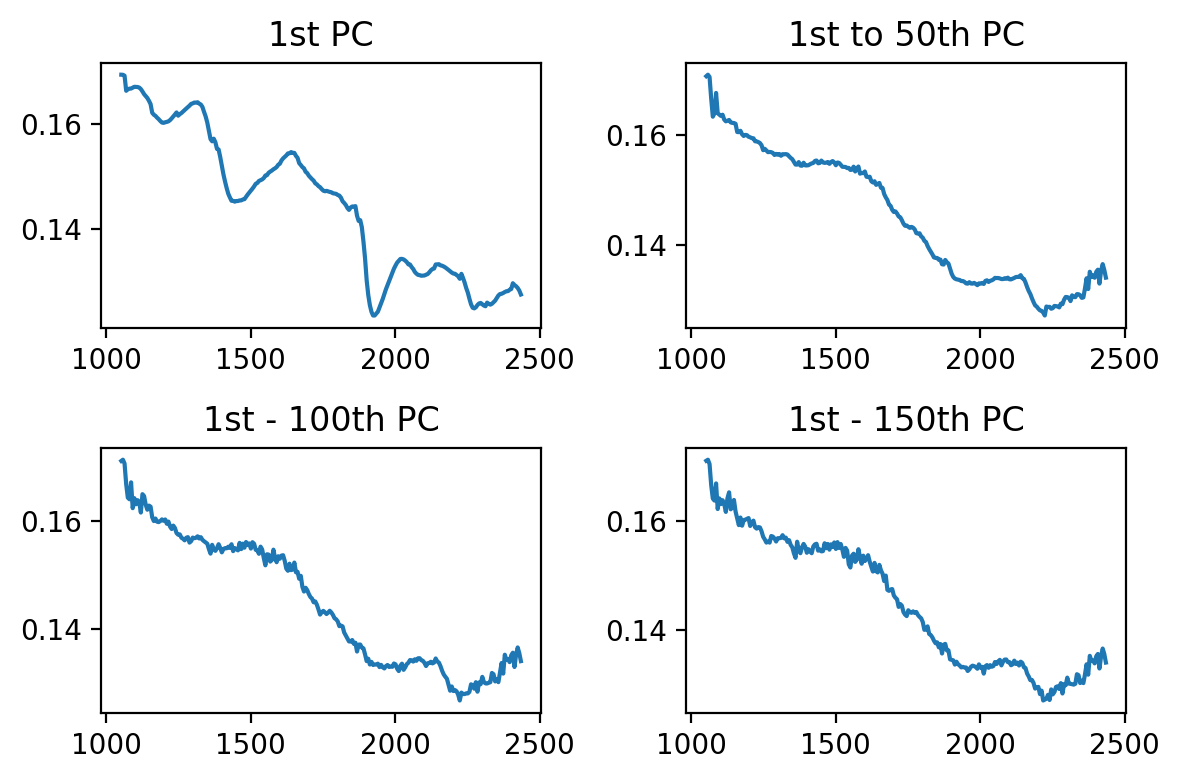

In [8]:
plt.figure()
plt.subplot(221)
plt.plot(bands, denoised[1000, 220])
plt.title('1st PC')
plt.subplot(222)
plt.plot(bands, denoised2[1000, 220])
plt.title('1st to 50th PC')
plt.subplot(223)
plt.plot(bands, denoised3[1000, 220])
plt.title('1st - 100th PC')
plt.subplot(224)
plt.plot(bands, denoised4[1000, 220])
plt.title('1st - 150th PC')
plt.tight_layout()

There is a significant amount of noise still present in the 1st - 50th pc transform.

In [4]:
denoised = pc.denoise(data, num=1)
denoised2 = pc.denoise(data, num=5)
denoised3 = pc.denoise(data, num=10)
denoised4 = pc.denoise(data, num=25)

Trying a different 4 transforms using different numbers of PCs to try and keep the maximum amount of signal

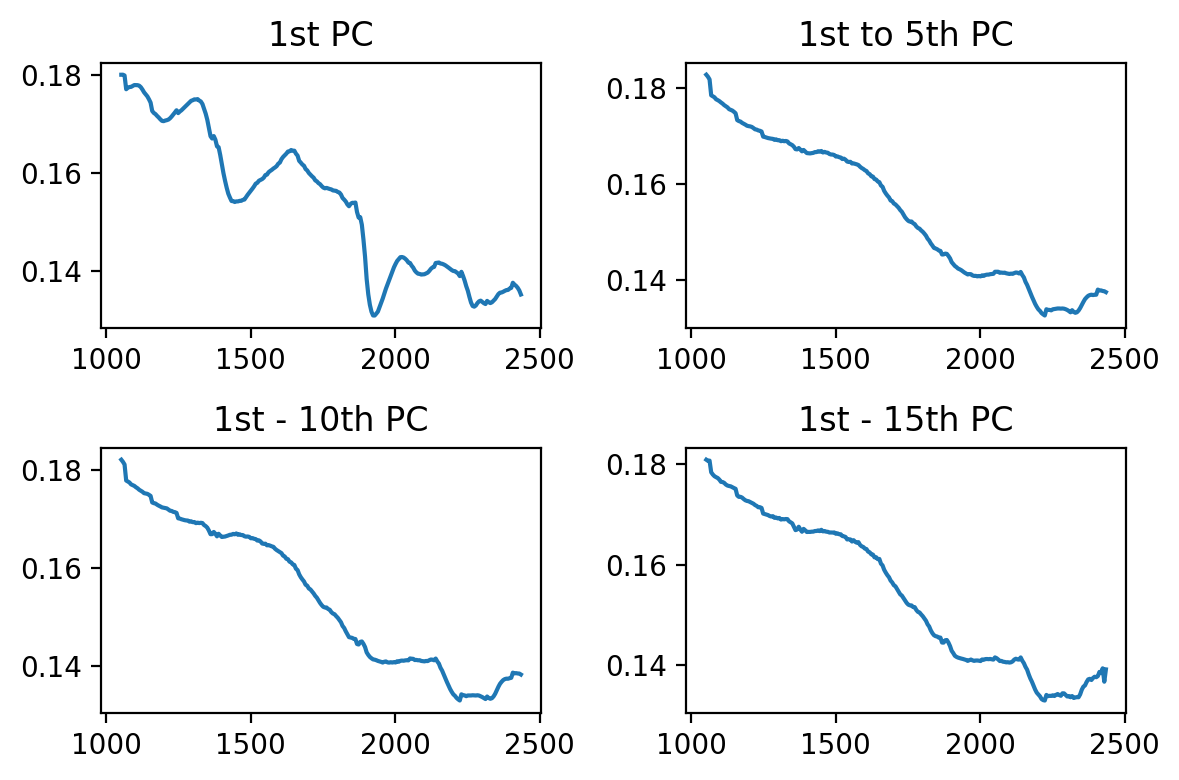

In [5]:
plt.figure()
plt.subplot(221)
plt.plot(bands, denoised[1200, 220])
plt.title('1st PC')
plt.subplot(222)
plt.plot(bands, denoised2[1200, 220])
plt.title('1st to 5th PC')
plt.subplot(223)
plt.plot(bands, denoised3[1200, 220])
plt.title('1st - 10th PC')
plt.subplot(224)
plt.plot(bands, denoised4[1200, 220])
plt.title('1st - 15th PC')
plt.tight_layout()

It can be seen that there is very little difference between the last 3 graphs, so more transforms can be explored

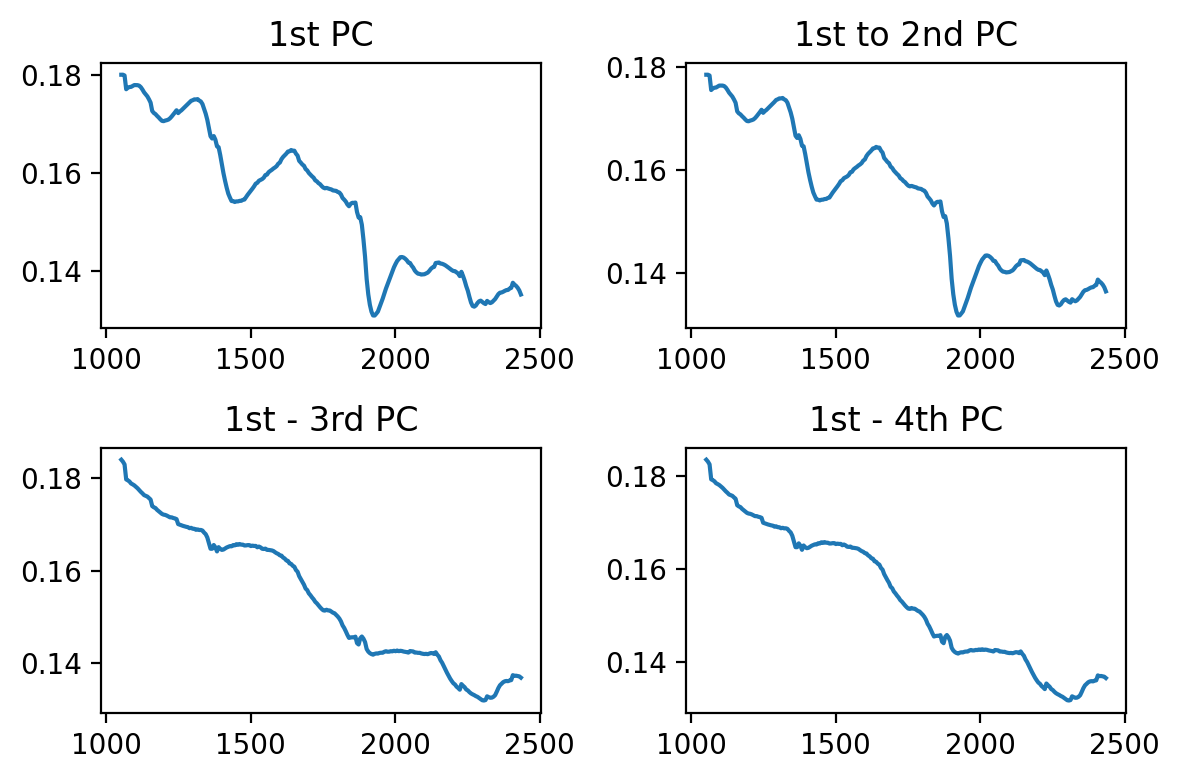

In [4]:
denoised = pc.denoise(data, num=1)
denoised2 = pc.denoise(data, num=2)
denoised3 = pc.denoise(data, num=3)
denoised4 = pc.denoise(data, num=4)
plt.figure()
plt.subplot(221)
plt.plot(bands, denoised[1200, 220])
plt.title('1st PC')
plt.subplot(222)
plt.plot(bands, denoised2[1200, 220])
plt.title('1st to 2nd PC')
plt.subplot(223)
plt.plot(bands, denoised3[1200, 220])
plt.title('1st - 3rd PC')
plt.subplot(224)
plt.plot(bands, denoised4[1200, 220])
plt.title('1st - 4th PC')
plt.tight_layout()

it can be seen that the 1st and 1st and 2nd pc transform are very similar. This was also apparent from the plot of the eigenvalues.
For this reason, the 1st pc transform is used for further image processing.

You will see in later notebooks further processing using different denoising transforms, so we will save some of the transformed data



In [5]:
np.save('/content/drive/MyDrive/Public/One_PC_denoised.npy', denoised)
np.save('/content/drive/MyDrive/Public/Four_PC_denoised.npy', denoised4)

**Savitzky-Golay filtering**

This section will demonstrate denoising using the SciPy Savitzky-Golay (SavGol) filter.

The SavGol is a 1 dimensional filter, so for multidimensional data the axis must be specified. The default keyword argument for the filter is -1, so the third axis of our data will be used by default.

To use the filter you must specify the window length (must be an odd number) and the order of the polynomial, here we will demonstrate some different parameters

In [6]:
import scipy.signal as sc
filtered = sc.savgol_filter(data, 5, 1)
filtered2 = sc.savgol_filter(data, 11, 1)
filtered3 = sc.savgol_filter(data, 15, 1)
filtered4 = sc.savgol_filter(data, 5, 2)
filtered5 = sc.savgol_filter(data, 11, 2)
filtered6 = sc.savgol_filter(data, 15, 2)

Now we can plot our pixel again for each of these transformed datasets

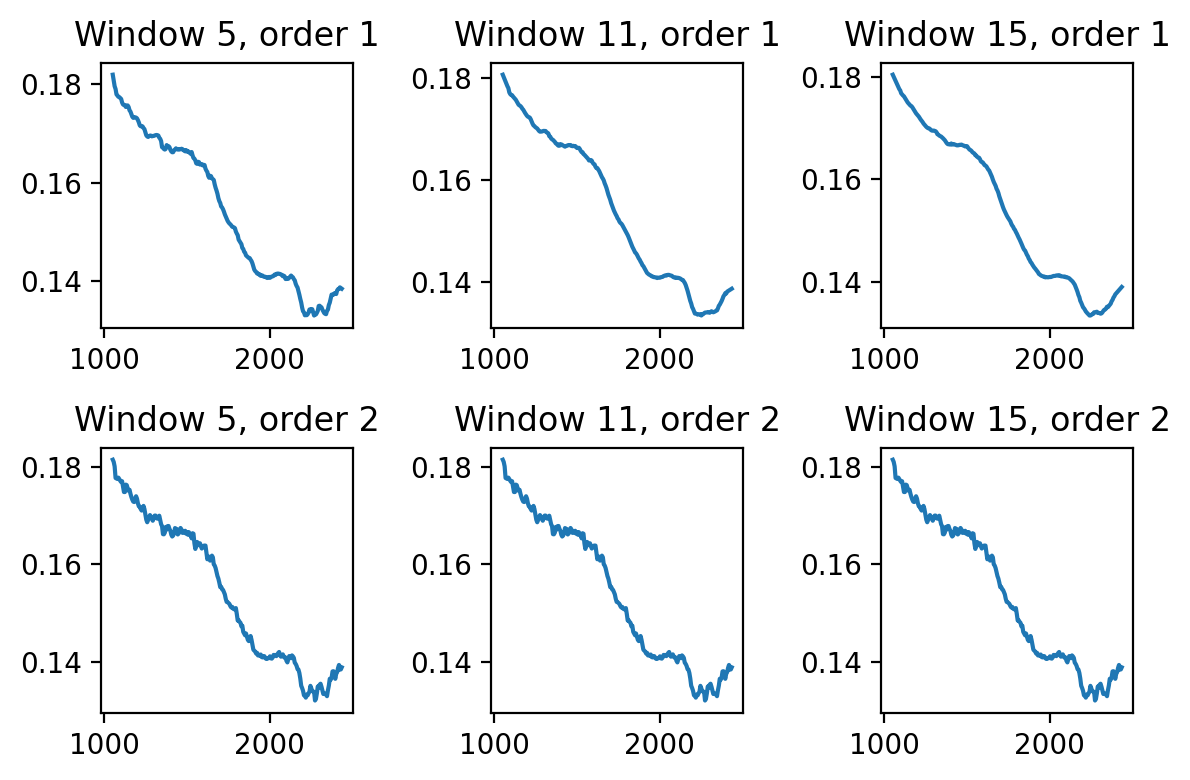

In [11]:
plt.rcParams['figure.dpi'] = 200
plt.figure()
plt.subplot(231)
plt.plot(bands, filtered[1200, 220])
plt.title('Window 5, order 1')
plt.subplot(232)
plt.plot(bands, filtered2[1200, 220])
plt.title('Window 11, order 1')
plt.subplot(233)
plt.plot(bands, filtered3[1200, 220])
plt.title('Window 15, order 1')
plt.subplot(234)
plt.plot(bands, filtered4[1200, 220])
plt.title('Window 5, order 2')
plt.subplot(235)
plt.plot(bands, filtered4[1200, 220])
plt.title('Window 11, order 2')
plt.subplot(236)
plt.plot(bands, filtered4[1200, 220])
plt.title('Window 15, order 2')
plt.tight_layout()

The graphs show that the second order polynomials still seem noisy, and the window size 11 and 15 seem over smoothed with 1st order polynomial.

Window size 5 with a first order polynomial seems the most useful, but the principal components method is preferred.